In [3]:
import numpy as np

START_KING = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
], dtype=bool)
START_WHITE = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
], dtype=bool)
START_BLACK = np.array([
    [0, 0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 0, 0, 0, 0, 0, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 0, 0, 0],
], dtype=bool)
BOARD_CASTLE = START_KING.copy()
BOARD_CAMPS = START_BLACK.copy()
BOARD_ESCAPES = np.array([
    [0, 1, 1, 0, 0, 0, 1, 1, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 1, 1, 0, 0, 0, 1, 1, 0],
], dtype=bool)

In [4]:
w = START_WHITE.copy()
b = START_BLACK.copy()
k = START_KING.copy()
c = BOARD_CAMPS + BOARD_CASTLE
BUILDINGS = BOARD_CAMPS + BOARD_CASTLE

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.colors import ListedColormap

def show(*data, size=3):
    palette = sns.color_palette("mako")
    uniqued = np.unique(data)
    # uniqued = np.delete(uniqued, np.where(uniqued > 20)
    vmin = 0
    vmax = 2+max(np.delete(uniqued, np.where(uniqued > 20)))
    l = len(data)
    if l > 1:
        fig, axs = plt.subplots(1, l,figsize=(size*l,size))
        i = 0
        for ax in axs:
            
            sns.heatmap(data[i], annot=True, cbar=False, ax=ax, square=True, cmap=palette, robust=True, vmax=vmax)
            i+=1
    else:
        plt.figure(figsize=(size, size))
        sns.heatmap(data[0], annot=True, cbar=False, square=True, cmap=palette, robust=True, vmax=vmax)

_b_colormap = ListedColormap(
    ["#7777AA", "#777777","#000000",  "#DDDDDD", "#DD4444"])
def show_board(k, w, b, size=3):
    p  = w*20
    p += k*30
    p += b*10
    p[p==0] = BUILDINGS[p==0]*-10
    plt.figure(figsize=(size, size))
    sns.heatmap(p, cmap=_b_colormap, annot=False, cbar=False, square=True)

# show(w,b,k)
# total = w + b + k
# show(total)
# show_board(w,k,b)

# Heuristic

In [14]:
K_BUILDINGS = 30
K_UNREACH = 20
K_PAWNS = 10

def rook_dist(pos:tuple, board: np.ndarray, max_iterations=5):
    rkd = np.ones((9,9)) * K_UNREACH
    rkd[board] = 99
    rkd[pos] = 0

    _rook_rec_dist(pos, rkd, board, 1)
    for ci in range(2, max_iterations+1):
        positions_to_eval = np.argwhere(rkd == ci-1)
        if len(positions_to_eval) == 0:
            break
        for p in positions_to_eval:
            _rook_rec_dist(p, rkd, board, ci)

    return rkd

def _rook_rec_dist(pos, rkd: np.ndarray, board: np.ndarray, ci: int):
        pos_row, pos_col = pos

        rows_l = range(pos_row-1, -1, -1)
        rows_r = range(pos_row+1, 9)
        cols_u = range(pos_col-1, -1, -1)
        cols_d = range(pos_col+1, 9)
        
        for rows in (rows_l, rows_r):
            for row in rows:
                if board[row, pos_col] or rkd[row,pos_col] < ci:
                    break
                rkd[row, pos_col] = ci
        for cols in (cols_u, cols_d):
            for col in cols:
                if board[pos_row, col] or rkd[pos_row, col] < ci:
                    break
                rkd[pos_row,col] = ci

def rook_dist_player(player_board, enemy_pawns, buildings=BUILDINGS, max_iterations=10):
    rkd = np.ones((9,9)) * K_UNREACH
    rkd[buildings] = K_BUILDINGS
    rkd[enemy_pawns] = K_PAWNS
    rkd[player_board] = 0
    for ci in range(1, max_iterations+1):
        positions_to_eval = np.argwhere(rkd == ci-1)
        if len(positions_to_eval) == 0:
            break
        for p in positions_to_eval:
            _rook_rec_dist(p, rkd, enemy_pawns+buildings, ci)

    return rkd

def rkdk(pawns_k, pawns_w, pawns_b, buildings=BUILDINGS, max_iterations=10):
    return rook_dist_player(pawns_k, pawns_w + pawns_b, buildings)

def rkdw(pawns_k, pawns_w, pawns_b, buildings=BUILDINGS, max_iterations=10):
    return rook_dist_player(pawns_w, pawns_k + pawns_b, buildings)



camps_clusters = [
    [[0,3], [0,4], [0,5], [1,4]],
    [[8,3], [8,4], [8,5], [7,4]],
    [[3,0], [4,0], [5,0], [4,1]],
    [[3,8], [4,8], [5,8], [4,7]],
]
camps_left = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
], dtype=bool)

camps_subgroups = [
    camps_left,
    np.rot90(camps_left),
    np.fliplr(camps_left),
    np.rot90(camps_left, -1)
]

def rkdb(pawns_k, pawns_w, pawns_b, buildings=BUILDINGS, max_iterations=10):
    enemy_pawns = pawns_w + pawns_k
    rkd = np.ones((9,9)) * K_UNREACH
    rkd[buildings] = K_BUILDINGS
    rkd[enemy_pawns] = K_PAWNS
    rkd[pawns_b] = 0
    for ci in range(1, max_iterations+1):
        positions_to_eval = np.argwhere(rkd == ci-1)
        if len(positions_to_eval) == 0:
            break
        for p in positions_to_eval:
            pos_row, pos_col = p
            tmp_buildings = buildings
            for cs in camps_subgroups:
                if cs[pos_row, pos_col]:
                    tmp_buildings = buildings.copy() ^ cs

            rows = range(pos_row-1, -1, -1), range(pos_row+1, 9)
            cols = range(pos_col-1, -1, -1), range(pos_col+1, 9)
            for rows in range(pos_row-1, -1, -1), range(pos_row+1, 9):
                for row in rows:
                    if (enemy_pawns+tmp_buildings)[row, pos_col] or rkd[row,pos_col] < ci:
                        break
                    rkd[row, pos_col] = ci
            for cols in range(pos_col-1, -1, -1), range(pos_col+1, 9):
                for col in cols:
                    if (enemy_pawns+tmp_buildings)[pos_row, col] or rkd[pos_row, col] < ci:
                        break
                    rkd[pos_row,col] = ci

    return rkd

def rook_distance_board(pawns, other_pawns, color, buildings=BUILDINGS, max_iterations=10):
    rkd = np.full((9,9), K_UNREACH)
    rkd[other_pawns] = K_PAWNS
    rkd[buildings] = K_BUILDINGS
    rkd[pawns] = 0

    for ci in range(1, max_iterations+1):
        positions_to_eval = np.argwhere(rkd == ci-1)
        if len(positions_to_eval) == 0:
            break

        for pos in positions_to_eval:
            pos_row, pos_col = pos
            tmp_buildings = buildings
            if color == 'b':
                for i in range(4):
                    if camps_subgroups[i][pos_row, pos_col]:
                        tmp_buildings = xor_camps_subgroups[i]
                        break
            obstacles = other_pawns + tmp_buildings

            for rows in range(pos_row - 1, -1, -1), range(pos_row + 1, 9):
                for row in rows:
                    if obstacles[row, pos_col] or rkd[row, pos_col] < ci:
                        break
                    rkd[row, pos_col] = ci
            for cols in range(pos_col - 1, -1, -1), range(pos_col + 1, 9):
                for col in cols:
                    if obstacles[pos_row, col] or rkd[pos_row, col] < ci:
                        break
                    rkd[pos_row, col] = ci
    return rkd
            

In [ ]:
w1 = START_WHITE.copy()
# move
m = (3,2)
w1[4, 2] = False
w1[m] = True
show(w1)
s = START_KING, w1, START_BLACK
show_board(START_KING, w1, START_BLACK)
show(rkdk(*s), rkdw(*s), rkdb(*s))

In [10]:
def generate_random(curr_tot_board, n_pawns):
    n = 0
    res = np.zeros((9,9), dtype=bool)
    while n < n_pawns:
        pos = np.random.randint(0,9), np.random.randint(0,9)
        if not curr_tot_board[pos] and not res[pos]:
            res[pos] = True
            n+=1
    return res

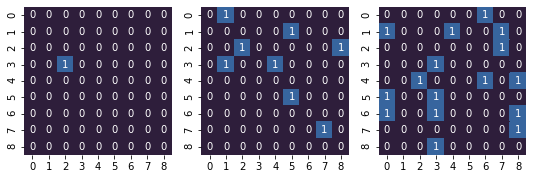

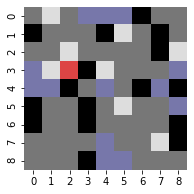

In [12]:
w = generate_random(BUILDINGS, 8)
k = generate_random(BOARD_CAMPS+w, 1)
b = generate_random(BOARD_CASTLE+w+k, 16)
show(k,w,b)
show_board(k, w, b)

CPU times: user 231 µs, sys: 4 µs, total: 235 µs
Wall time: 206 µs
CPU times: user 614 µs, sys: 85 µs, total: 699 µs
Wall time: 708 µs
CPU times: user 936 µs, sys: 0 ns, total: 936 µs
Wall time: 942 µs


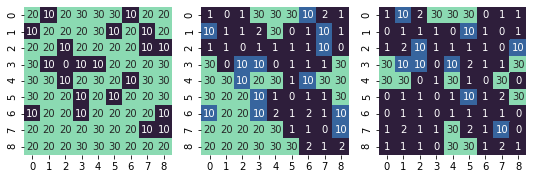

In [16]:
%time rook_dist_king  = rook_distance_board(k, w+b, 'w')
%time rook_dist_white = rook_distance_board(w, k+b, 'w')
%time rook_dist_black = rook_distance_board(b, k+w, 'w')
show(rook_dist_king, rook_dist_white, rook_dist_black)

In [ ]:
KERNEL = np.array([[0,1], [-1,0], [0,-1], [1,0]])
def mask_rk(rk_matrix, kernel=KERNEL):
    indices = np.argwhere(rk_matrix==0)
    masked = np.zeros((9,9))
    for i in indices:
        # masked[tuple(i)] = -10
        for k in kernel:
            ki = tuple(i+k)
            if all((0 <= t <= 8 for t in ki)):
                ki = tuple(ki)
                masked[ki] = rk_matrix[ki]
    return masked

In [ ]:
m_rkk = mask_rk(rook_king)
m_rkw = mask_rk(rook_white)
m_rkb = mask_rk(rook_black)

show(m_rkk, m_rkw, m_rkb)

In [ ]:
def safeness(pawns, enemy_rkm):
    pawn_positions = np.argwhere(pawns)
    if len(pawn_positions) == 0:
        return 0
    #h_safeness, v_safeness, t_safeness = 0, 0, 0
    t_safeness = []
    for pos_row, pos_col in pawn_positions:
        h_safeness, v_safeness = 0, 0
        for d_row in (1, -1):
            row = pos_row+d_row
            if 0 <= row <= 8:
                rkm_val = enemy_rkm[row, pos_col]
            else:
                rkm_val = K_PAWNS #TODO: check here
            v_safeness += rkm_val
        for d_col in (-1, 1):
            col = pos_col+d_col
            if 0 <= col <= 8:
                rkm_val = enemy_rkm[pos_row, col]
            else:
                rkm_val = K_PAWNS #TODO: check here
            h_safeness += rkm_val
        t_safeness.append(min(h_safeness, v_safeness))
    
    return np.sort(t_safeness)
    # return min(h_safeness, v_safeness) / len(pawn_positions)
    # TODO: Improve safeness by adding -castle handling for king and -camps handling for blacks

print("King  safeness:",safeness(k, rook_black))
print("White safeness:",safeness(w, rook_black))
print("Black safeness:",safeness(b, rook_white))

In [ ]:
escape_positions = [
    (0,1), (0,2), (0,6), (0,7), 
    (1,8), (2,8), (6,8), (7,8), 
    (8,1), (8,2), (8,6), (8,7),
    (1,0), (2,0), (6,0), (7,0),
]
def king_liberty(king_rk):
    kl = [king_rk[ep] for ep in escape_positions]
    return np.sort(kl)

print("King's liberty: ", king_liberty(rook_king))

In [ ]:
def pawn_count(pawn_board):
    return np.sum(pawn_board)

print(pawn_count(k))
print(pawn_count(w))
print(pawn_count(b))

In [ ]:
def _handle_b(o_row, o_col, buildings=BUILDINGS):
    for cs in camps_subgroups:
        if cs[o_row, o_col]:
            return buildings.copy() ^ cs
    return buildings
def _handle_w(*any, buildings=BUILDINGS):
    return buildings

def generate_moves(pawn_board, total_board, color, buildings=BUILDINGS):
    origins = [tuple(p) for p in np.argwhere(pawn_board)]
    moves = {}
    handler = _handle_b if color=='b' else _handle_w

    for o in origins:
        destinations = []
        o_row, o_col = o
        tmp_buildings = handler(o_row, o_col, buildings=buildings)

        for rows in range(o_row-1, -1, -1), range(o_row+1, 9):
            for d_row in rows:
                if (total_board+tmp_buildings)[d_row, o_col]:
                    break
                destinations.append((d_row, o_col))
        for cols in range(o_col-1, -1, -1), range(o_col+1, 9):
            for d_col in cols:
                if (total_board+tmp_buildings)[o_row, d_col]:
                    break
                destinations.append((o_row, d_col))

        moves[o] = destinations
    
    return moves

print(generate_moves(w, w+b+k, color='w'))
show_board(k,w,b)



# Search

In [ ]:
# Zobrist hashing


np.random.seed(0)
_randargs = {"high":np.iinfo(np.uint64).max, "dtype":np.uint64, "size":(4,9,9)}

zobrist_table_k = np.random.randint(0, **_randargs)
zobrist_table_w = np.random.randint(0, **_randargs)
zobrist_table_b = np.random.randint(0, **_randargs)
for zt in zobrist_table_k, zobrist_table_w, zobrist_table_b:
    for rot in (1,2,3):
        zt[rot] = np.rot90(zt[rot-1])  

def zhash(k, w, b, rot=0):
    tt = zobrist_table_k[rot, k].ravel(), zobrist_table_w[rot, w].ravel(), zobrist_table_b[rot, b].ravel()
    z = np.zeros(1, dtype=np.uint64)
    for t in tt:
        for e in t:
            z = np.bitwise_xor(z, e)
    return z[0]

def hyper_zhash(k, w, b):
    return [zhash(k,w,b, rot=r) for r in (0,1,2,3)]

zhash(k,w,b)


In [ ]:
k1 = generate_random(BOARD_CAMPS, 1)
w1 = generate_random(k1+BUILDINGS, 8)
b1 = generate_random(BOARD_CASTLE+w1+k1, 16)
s1 = k1, w1, b1
show_board(*s1)
hzh1 = hyper_zhash(*s1)
print(hzh1)

k2 = np.rot90(k1)
w2 = np.rot90(w1)
b2 = np.rot90(b1)
s2 = k2, w2, b2
show_board(*s2)
zh2 = zhash(*s2)
print(zh2)

In [ ]:
def advance_state(k,w,b, origin, destination):
    for pawns in k,w,b:
        if pawns[origin]:
            pawns[origin] = False
            pawns[destination] = True
            return

def revert_state(k,w,b, origin, destination):
    advance_state(k,w,b, destination, origin)

def revert_state_explicit(k,w,b, origin, destination):
    for pawns in k,w,b:
        if pawns[destination]:
            pawns[destination] = False
            pawns[origin] = True
            return

# to be called after advance
capture_delta_window = ((0,-1), (-1,0), (0,1), (1,0))
def get_capture_victims(k,w,b, color, move_destination):
    victims={'k':[], 'w':[], 'b':[]}
    allies = k+w if color == 'w' else b
    enemies  = b if color == 'w' else k+w
    
    ratt, catt = move_destination  #row attacker, col attacker
    for drv, drc in capture_delta_window:
        rvic, cvic = ratt + drv, catt + drc
        radj, cadj = rvic + drv, cvic + drc
        
        if not all(0 <= v <= 8 for v in (rvic,cvic,radj,cadj)):
            continue
        # todo rem enemies here
        if not (enemies[rvic, cvic] and (allies[radj, cadj] or BUILDINGS[radj, cadj])) :
            continue

        if color == 'w':
            if (radj, cadj) in [(4,0), (4,8), (0,4), (8,4)]:
                continue
            if b[radj, cadj]:
                victims['b'].append((rvic,cvic))
            continue
        #else b
        if w[rvic, cvic]:
            victims['w'].append((rvic,cvic))
            continue


        # king near castle
        kings_safe_pos = ((3,4), (4,4), (5,4), (4,3), (5,3))
        is_k_near_castle = (rvic, cvic) in kings_safe_pos
        #is_k_near_castle = 3<=rvic<=5 and 3<=cvic<=5 and not (rvic+cvic == 8 or rvic==cvic)
        is_k_captured = True
        if is_k_near_castle:
            for dr, dc in capture_delta_window:
                row, col = rvic+dr, cvic+dc
                is_k_captured = is_k_captured and (BOARD_CASTLE[row, col] or b[row, col])
        if is_k_captured:
            victims['k'].append((rvic, cvic))
    
    return victims

def _handle_captures(k,w,b, capture_map, newval):
    board = {'k':k, 'w':w, 'b':b}
    for key in capture_map.keys():
        for capture_position in capture_map[key]:
            board[key][capture_position] = newval

def apply_captures(k,w,b, capture_list):
    _handle_captures(k,w,b,capture_list, False)

def revert_captures(k,w,b, capture_list):
    _handle_captures(k,w,b,capture_list, True)
 

In [ ]:
def get_best_move_mkii(k, w, b, color, depth):
    # print(possible_moves) ##
    # TODO: move ordering?
    total_nodes.clear()
    visited_nodes.clear()
    evaluated_nodes.clear()
    total_nodes.insert(0, 0)
    visited_nodes.insert(0, 0)
    evaluated_nodes.insert(0, 0)
    
    total = w+b+k
    curr_state = k, w, b
    best_move = None
    alpha = float('-inf')
    beta = float('inf')

    total_nodes.clear()
    visited_nodes.clear()
    evaluated_nodes.clear()
    total_nodes.insert(0, 0)
    visited_nodes.insert(0, 0)
    evaluated_nodes.insert(0, 0)
    
    visited_moves = []

    if color == 'w':
        possible_moves = {**generate_moves(k, total, color), **generate_moves(w, total, color)}
        total_nodes[0] += sum(len(pmv_array) for pmv_array in possible_moves.values())  # TODO: remove
        for origin in possible_moves.keys():
            for destination in possible_moves[origin]:
                advance_state(*curr_state, origin, destination)
                captures = get_capture_victims(*curr_state, color, destination)
                apply_captures(*curr_state, captures)

                # TODO improve here!
                #curr_score = evaluate(*curr_state, color, best_score, depth)
                curr_score = minimax(*curr_state, 'w', alpha, beta, depth-1) #what color here?

                revert_state(*curr_state, origin, destination)
                revert_captures(*curr_state, captures)

                visited_moves.append(((origin, destination), curr_score))

                if curr_score > alpha:
                    alpha = curr_score
                    best_move = origin, destination
        print(visited_moves)
    else:
        possible_moves = generate_moves(b, total, color)
        total_nodes[0] += sum(len(pmv_array) for pmv_array in possible_moves.values())  # TODO: remove
        for origin in possible_moves.keys():
            for destination in possible_moves[origin]:
                advance_state(*curr_state, origin, destination)
                captures = get_capture_victims(*curr_state, color, destination)
                apply_captures(*curr_state, captures)

                # TODO improve here!
                #curr_score = evaluate(*curr_state, color, best_score, depth)
                curr_score = minimax(*curr_state, 'b', alpha, beta, depth-1) #what color here?

                revert_state(*curr_state, origin, destination)
                revert_captures(*curr_state, captures)

                if curr_score < beta:
                    beta = curr_score
                    best_move = origin, destination

    # print(best_score, best_move) ##
    return best_move

In [7]:
visited_nodes = []
total_nodes = []
evaluated_nodes = []

def get_best_move(k, w, b, color, depth):
    total = w+b+k
    curr_state = k, w, b
    best_move = None

    if color == 'w':
        possible_moves = {**generate_moves(k, total, color), **generate_moves(w, total, color)}
        best_score = float('-inf')
        is_currscore_better = lambda best, curr: best < curr 
    else:
        possible_moves = generate_moves(b, total, color)
        best_score = float('inf')
        is_currscore_better = lambda best, curr: best > curr 

    # print(possible_moves) ##
    # TODO: move ordering?
    total_nodes.clear()
    visited_nodes.clear()
    evaluated_nodes.clear()
    total_nodes.insert(0, 0)
    visited_nodes.insert(0, 0)
    evaluated_nodes.insert(0, 0)
    total_nodes[0] += len(possible_moves.values())  # TODO: remove
    for origin in possible_moves.keys():
        for destination in possible_moves[origin]:
            advance_state(*curr_state, origin, destination)
            captures = get_capture_victims(*curr_state, color, destination)
            apply_captures(*curr_state, captures)

            # TODO improve here!
            #curr_score = evaluate(*curr_state, color, best_score, depth)
            curr_score = minimax(*curr_state, color, float('-inf'), float('inf'), depth-1) #what color here?

            revert_state(*curr_state, origin, destination)
            revert_captures(*curr_state, captures)
            if is_currscore_better(best_score, curr_score):
                best_score = curr_score
                best_move = (origin, destination)
    # print(best_score, best_move) ##
    return best_move



def heuristic(k,w,b, color):
    # TODO here handle terminal states (king capture, king escape)
    evaluated_nodes[0] += 1 # TODO: remove
    
    rook_dist_king  = rook_distance_board(k, w+b, 'w')
    rook_dist_white = rook_distance_board(w, k+b, 'w')
    rook_dist_black = rook_distance_board(b, k+w, 'w')
    
    # if not np.any(k):
    #     return float('-inf')

    kl = king_liberty(rook_dist_king)
    kl = sum(kl[-i] / (i+1) for i in range(len(kl)))
    # if kl == 0:
    #     return float('inf')
    
    h = safeness(k, rook_dist_black)[0] / kl
    h *= 1*(pawn_count(w)/8 - pawn_count(b)/16)

    sfns_black = np.minimum(safeness(b, rook_white), safeness(k, rook_king))
    sfns_white = safeness(w, rook_black)

    ksfns_w = sum(sfns_white[-i] / (i+1) for i in range(len(sfns_white))) / len(sfns_white)
    ksfns_b = sum(sfns_black[-i] / (i+1) for i in range(len(sfns_black))) / len(sfns_black)
    h *= (ksfns_w - ksfns_b)
    #h *= 0.25*(safeness(w, rook_black)[0] + safeness(b, rook_white)[0]) #here should also be the king

    return h if color =='w' else -h


infty = np.finfo('f').max

def minimax(k,w,b, color, alpha, beta, depth):
    king_positions = np.argwhere(k)
    visited_nodes[0] += 1  # TODO: remove
    if len(king_positions) == 0:
        val = -infty / (MAX_DEPTH-depth)
        # print("val", val, "at", (MAX_DEPTH-depth))
        return val
    if tuple(king_positions[0]) in escape_positions:
        val = infty / (MAX_DEPTH-depth)
        # print("val", val, "at", (MAX_DEPTH-depth))
        return val
    if depth == 0:
        return heuristic(k,w,b, color)

    total = k+w+b
    curr_state = k,w,b
    if color == 'w':
        max_score = float('-inf')
        possible_moves = {**generate_moves(k, total, color), **generate_moves(w, total, color)}
        total_nodes[0] += sum(len(pmv_array) for pmv_array in possible_moves.values())  # TODO: remove
        for origin in possible_moves.keys():
            for destination in possible_moves[origin]:
                #
                advance_state(*curr_state, origin, destination)
                captures = get_capture_victims(*curr_state, color, destination)
                apply_captures(*curr_state, captures)
                #
                curr_score = minimax(*curr_state, 'b', alpha, beta, depth-1)
                #
                revert_state(*curr_state, origin, destination)
                revert_captures(*curr_state, captures)

                max_score = max(max_score, curr_score)
                alpha = max(alpha, curr_score)

                if beta <= alpha:
                    return max_score
        return max_score
    else:
        max_score = float('inf')
        possible_moves = generate_moves(b, total, color)
        total_nodes[0] += sum(len(pmv_array) for pmv_array in possible_moves.values())  # TODO: remove
        for origin in possible_moves.keys():
            for destination in possible_moves[origin]:
                #
                advance_state(*curr_state, origin, destination)
                captures = get_capture_victims(*curr_state, color, destination)
                apply_captures(*curr_state, captures)
                #
                curr_score = minimax(*curr_state, 'w', alpha, beta, depth-1)
                #curr_score = min(curr_score, minimax(*curr_state, 'w', alpha, beta, depth-1))
                #
                revert_state(*curr_state, origin, destination)
                revert_captures(*curr_state, captures)

                max_score = min(max_score, curr_score)
                beta = min(beta, curr_score)

                if beta <= alpha:
                    return max_score
        return max_score


In [ ]:
k0 = generate_random(BOARD_CAMPS, 1)
w0 = generate_random(k0+BUILDINGS, 8)
b0 = generate_random(BOARD_CASTLE+w0+k0, 16)
s0 = k0, w0, b0
show_board(k0,w0,b0)


In [ ]:
k = k0.copy()
w = w0.copy()
b = b0.copy()

MAX_DEPTH = 3
color = 'b'
n_steps = 10
while n_steps > 0:
    n_steps -= 1
    move = get_best_move_mkii(k,w,b, color, MAX_DEPTH)
    print(move)
    print(visited_nodes, evaluated_nodes, total_nodes)

    advance_state(k,w,b, *move)
    capts = get_capture_victims(k,w,b, color, move[1])
    apply_captures(k,w,b, capts)
    show_board(k,w,b)
    color = 'w' if color == 'b' else 'b'

